In [46]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

import statistics 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree            import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn                 import datasets
from matplotlib.colors       import ListedColormap
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import classification_report
from sklearn.metrics         import plot_confusion_matrix
from matplotlib              import pyplot
from sklearn.metrics         import roc_curve

from sklearn.naive_bayes     import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn                 import metrics
from sklearn.preprocessing   import StandardScaler

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [47]:
df = pd.read_csv("C:/Users/ISD/Python_ali/fault_detection/Pv_Data2.csv")
df;
X = df.drop(['Target'],axis=1).values

Y=df.loc[:,'Target']
X.shape

(1600, 7)

In [48]:
pca = PCA(n_components=7)

In [49]:
pca.fit(X)

PCA(n_components=7)

In [50]:
X_pca = pca.transform(X)

In [51]:
trainX, testX,trainY,testY = train_test_split(X_pca ,Y, test_size=0.3, random_state=0)

In [52]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

In [53]:
model = GaussianNB()
model.fit(trainX, trainY);

In [54]:
ypred=model.predict(trainX)

In [55]:
c=accuracy_score(trainY,ypred)*100
c

84.73214285714286

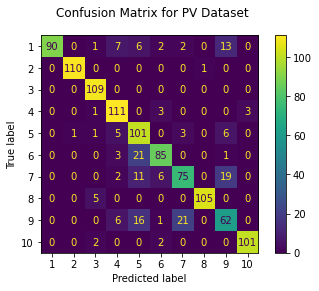

In [56]:
fig = plot_confusion_matrix(model,trainX,trainY, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Dataset")
plt.show()

In [57]:
ypred1=model.predict(testX)

In [58]:
c=accuracy_score(testY,ypred1)*100
c

85.83333333333333

In [59]:
YR=np.concatenate((trainY,testY),axis=0)

In [60]:
YP = np.concatenate((ypred,ypred1), axis=0)

In [61]:
ac2=accuracy_score(YR,YP)*100
ac2

85.0625

In [62]:
c2=confusion_matrix(YR,YP)
c2

array([[120,   0,   1,   8,   7,   4,   2,   0,  18,   0],
       [  0, 159,   0,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0, 158,   0,   0,   0,   0,   2,   0,   0],
       [  0,   0,   2, 152,   0,   3,   0,   0,   0,   3],
       [  0,   1,   1,   8, 137,   0,   4,   0,   9,   0],
       [  0,   0,   0,   6,  29, 121,   0,   2,   2,   0],
       [  0,   0,   0,   3,  14,  10, 110,   0,  23,   0],
       [  0,   0,   7,   0,   0,   0,   0, 153,   0,   0],
       [  0,   0,   0,   8,  27,   1,  28,   0,  96,   0],
       [  0,   0,   2,   1,   0,   2,   0,   0,   0, 155]], dtype=int64)